# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [8]:
df = pd.read_csv('garisKemiskinan.csv')
df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
# Tinjau jumlah baris dan kolom dalam dataset
print('jumlah baris : {}'.format(df.shape[0]))
print('jumlah kolom: {}'.format(df.shape[1]))

jumlah baris : 5460
jumlah kolom: 6


In [11]:
# Tinjau jenis data di setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [12]:
#Identifikasi missing values
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
provinsi,object,35,0
jenis,object,3,0
daerah,object,3,0
tahun,int64,10,0
periode,object,2,0
gk,float64,5191,199


In [13]:
# Analisis distribusi variabel numerik dengan statistik deskriptif
df.describe()

,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


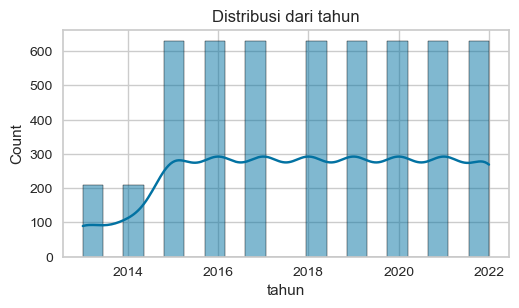

In [14]:
# visualisasi distribusi variabel numerik menggunakan histogram
numeric_columns = df.select_dtypes(include=['int64']).columns
fig, axes = plt.subplots(
    7, 2, figsize=(10, 20))

for i, kolom in enumerate(numeric_columns):
 row = i // 2
 col = i % 2
 sns.histplot(data=df, x=kolom, kde=True, ax=axes[row, col])
 axes[row, col].set_title(f'Distribusi dari {kolom}')

for i in range(len(numeric_columns), 7 * 2):
  row = i // 2
  col = i % 2
  fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [15]:
# Menghitung matriks korelasi
corr = df[numeric_columns].corr()
corr

,tahun
tahun,1.0


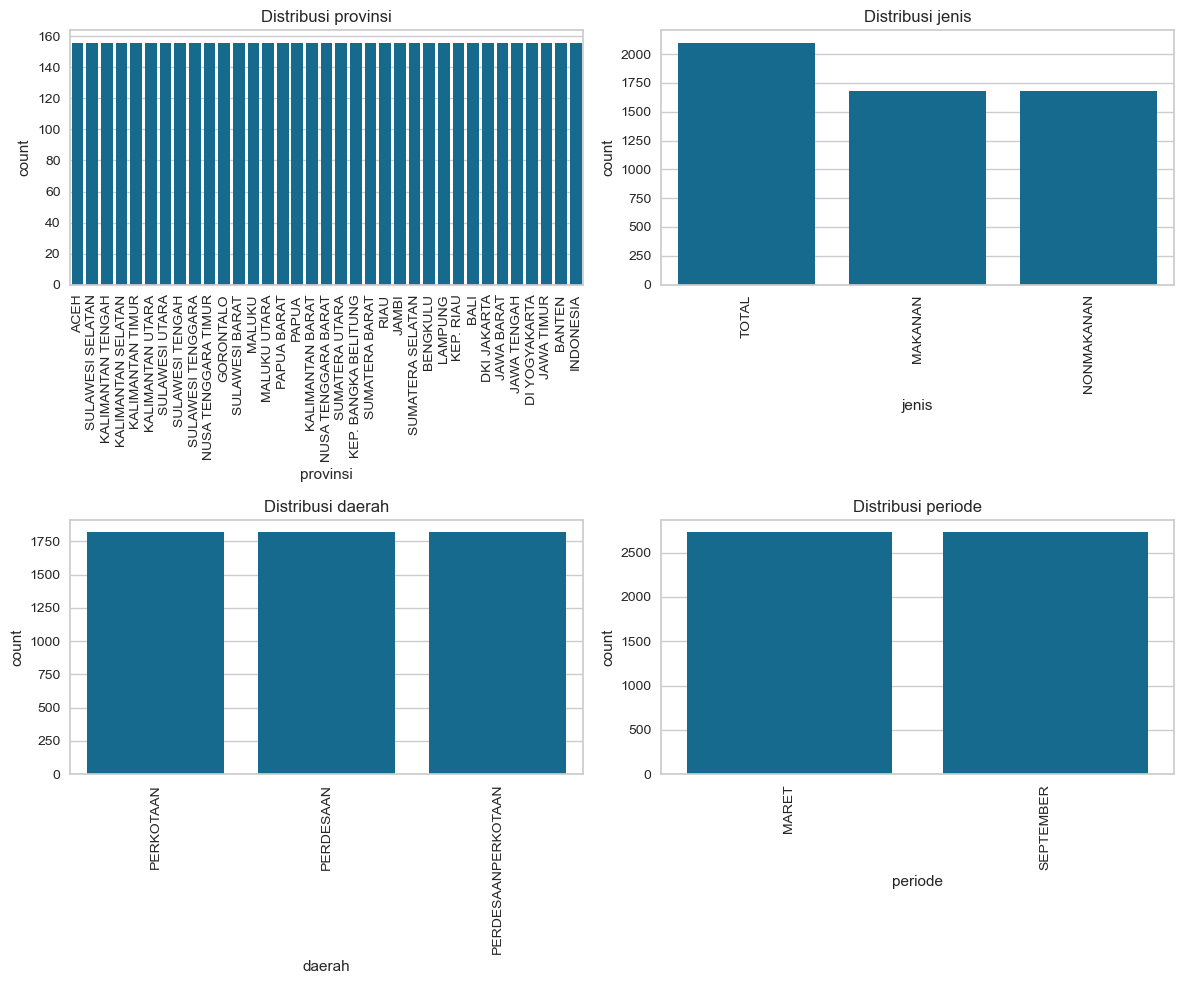

In [16]:
#Visualisasi untuk kolom kategorikal

categorical_columns = ['provinsi', 'jenis', 'daerah', 'periode']

plt.figure(figsize=(12,10))

for i, col in enumerate(categorical_columns, 1):
  plt.subplot(2, 2, i)
  sns.countplot(data=df, x=col, order=df[col].value_counts().index)
  plt.title(f'Distribusi {col}')
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

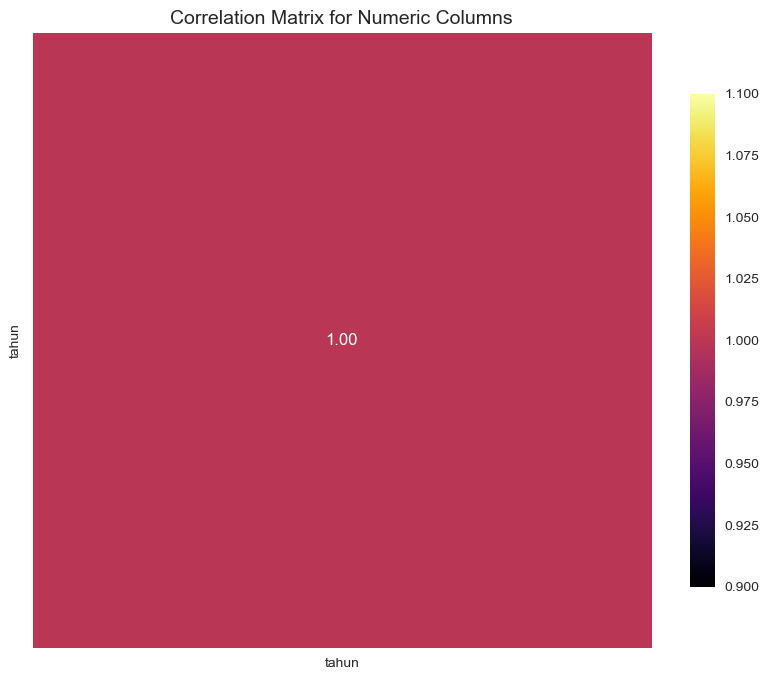

In [17]:
# Visualisasi untuk menampilkan matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='inferno', fmt=".2f", linewidths=.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix for Numeric Columns', fontsize=14)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [20]:
#1. Menghapus data kosong/tidak
newdf = df.dropna()
print('Sudah dihapus data kosong: {}'.format(df.shape[0] - newdf.shape[0]))
newdf.info()

Sudah dihapus data kosong: 199
<class 'pandas.core.frame.DataFrame'>
Index: 5261 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5261 non-null   object 
 1   jenis     5261 non-null   object 
 2   daerah    5261 non-null   object 
 3   tahun     5261 non-null   int64  
 4   periode   5261 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 287.7+ KB


In [21]:
#2. Menghapus duplikat data
duplicates = newdf.duplicated()
print ('Jumlah data duplikat:', duplicates.sum())

#Note: dataset ini tidak ada duplikat, jadi abaikan aja

Jumlah data duplikat: 0


In [22]:
#3. normalisasi atau standarisasi fitur
numeric_columns = newdf.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
newdf[numeric_columns] = scaler.fit_transform(newdf[numeric_columns])

print(newdf[numeric_columns].head())

      tahun        gk
0 -1.302065 -0.064537
1 -1.302065 -0.011230
2 -0.900720  0.014788
3 -0.900720  0.100302
4 -1.302065 -0.040624


C:\Users\Auric\AppData\Local\Temp\ipykernel_27964\460341083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[numeric_columns] = scaler.fit_transform(newdf[numeric_columns])


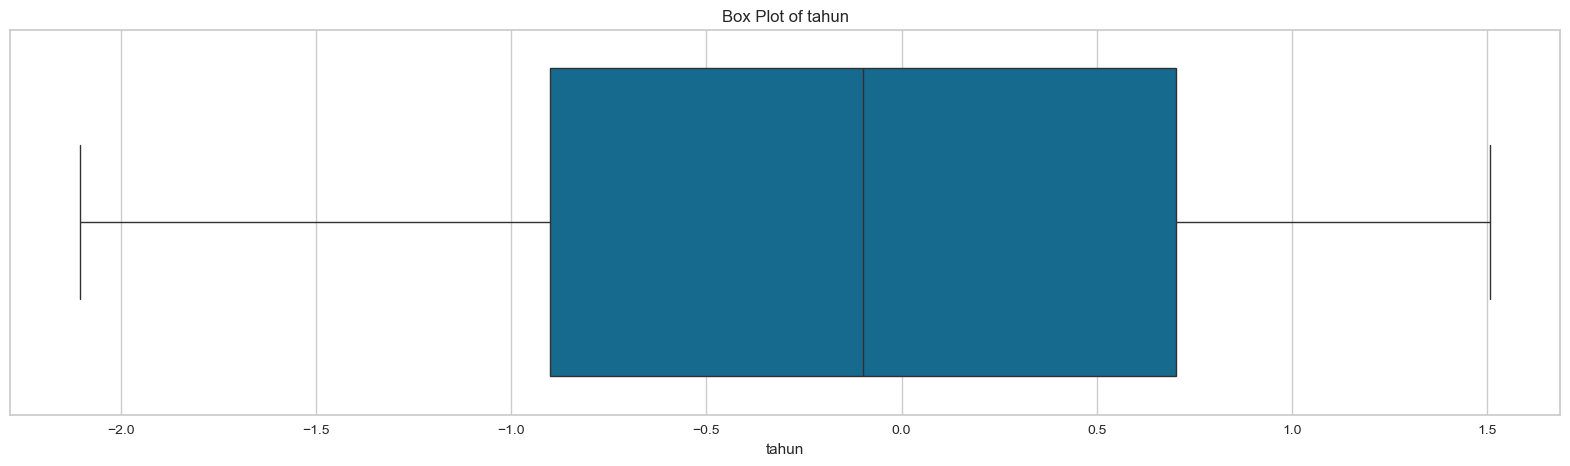

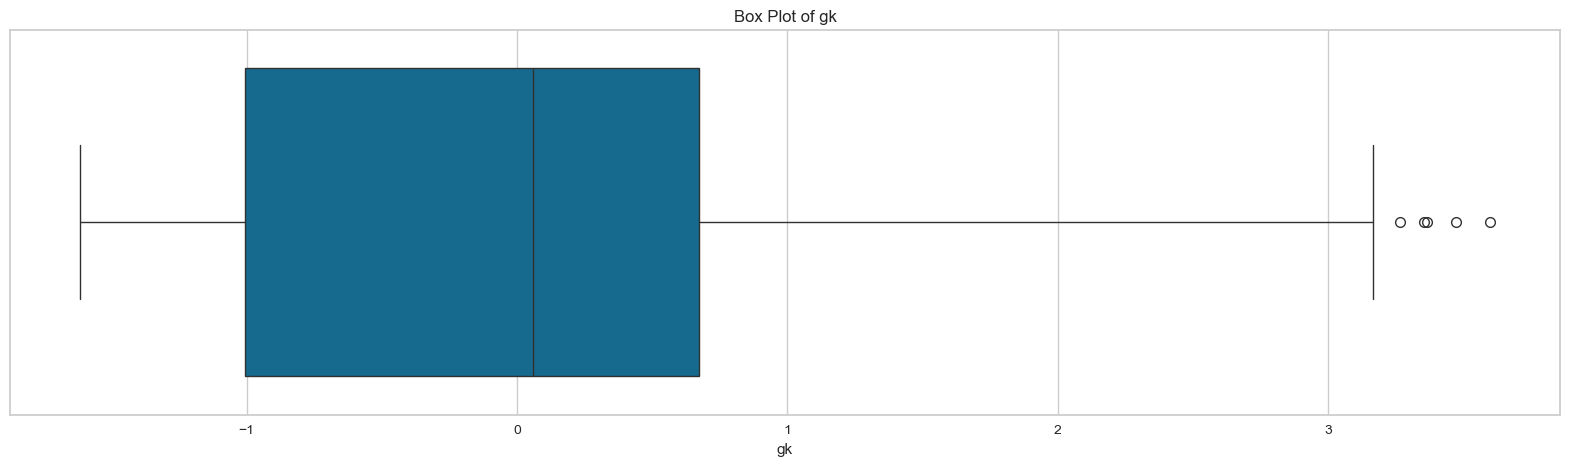

In [23]:
#4. Deteksi dan Penanganan Outlier
for outlier in numeric_columns:
    plt.figure(figsize=(20, 5))
    sns.boxplot(x=newdf[outlier])
    plt.title(f'Box Plot of {outlier}')
    plt.show()

In [24]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_IQR(newdf):
    outlier_indices = []
    for col in newdf.select_dtypes(include=['int64', 'float64']):
        Q1 = newdf[col].quantile(0.25)
        Q3 = newdf[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(newdf[(newdf[col] < lower_bound) | (newdf[col] > upper_bound)].index)
    return set(outlier_indices)

outliers = detect_outliers_IQR(df)
newdf = newdf.drop(index=outliers)

print(f'Data After Removing Outliers: {newdf.shape}')

Data After Removing Outliers: (5256, 6)


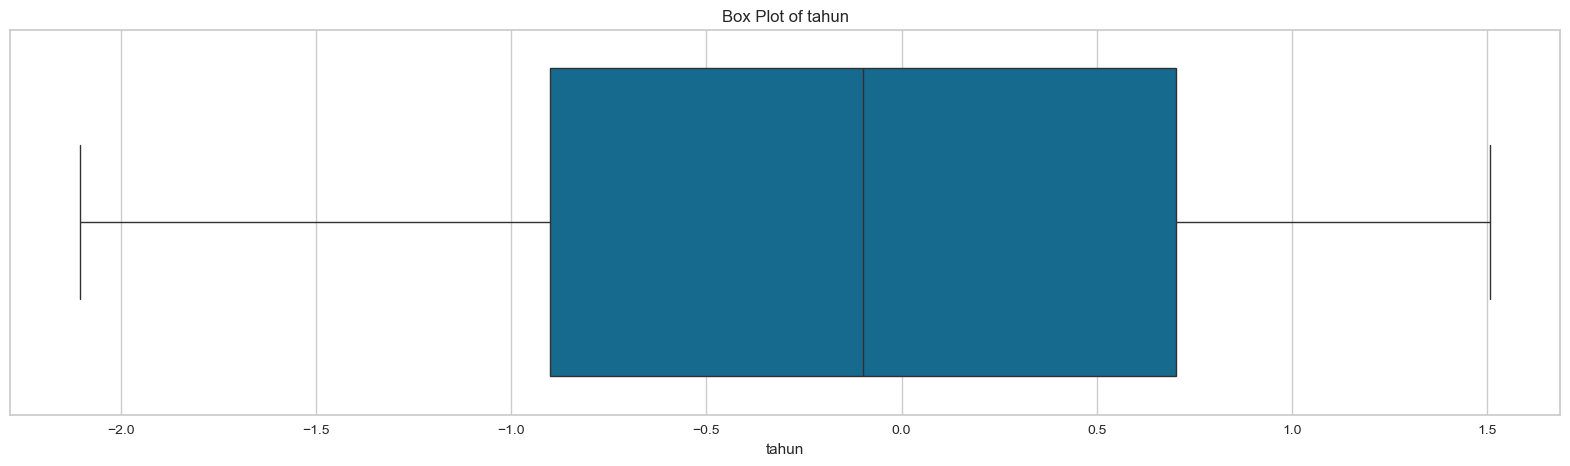

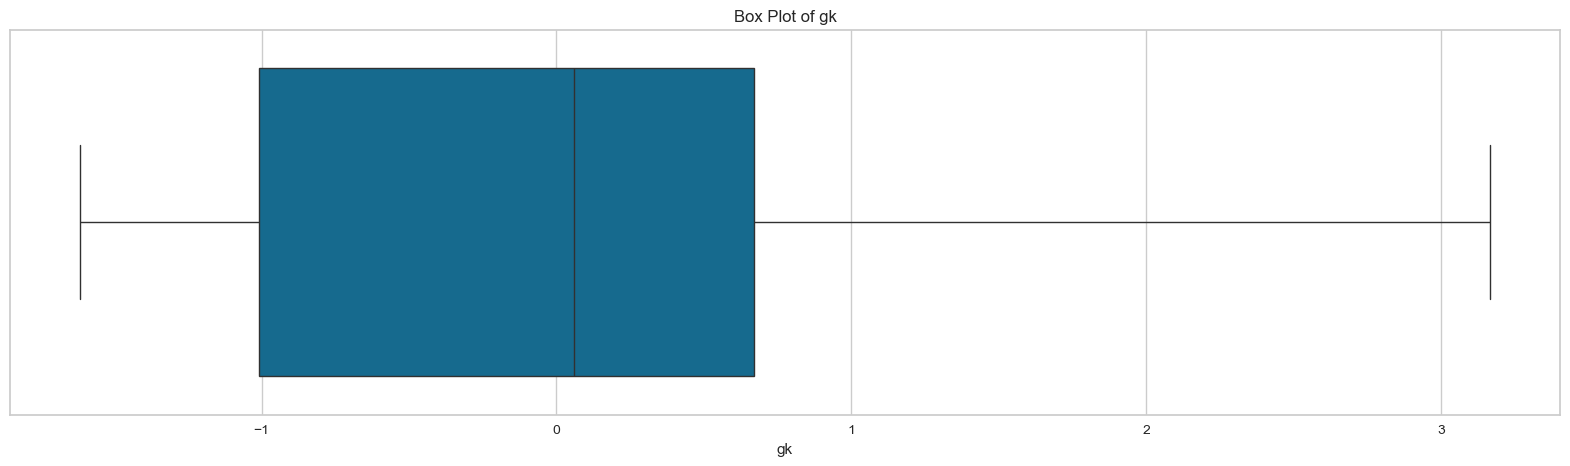

In [25]:
# hasil setelah menghapus outlier
for outlier in numeric_columns:
    plt.figure(figsize=(20, 5))
    sns.boxplot(x=newdf[outlier])
    plt.title(f'Box Plot of {outlier}')
    plt.show()

In [26]:
#5. Encoding Data Kategorikal

label_encoder = LabelEncoder()
categorical_cols = newdf.select_dtypes(include=['object']).columns

for col in categorical_cols:
    newdf[col] = label_encoder.fit_transform(newdf[col])

newdf.info() # check info dataset tiap column setelah melakukan encoding
newdf.head() # check dataset saat ini setelah melakukan encoding

<class 'pandas.core.frame.DataFrame'>
Index: 5256 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5256 non-null   int32  
 1   jenis     5256 non-null   int32  
 2   daerah    5256 non-null   int32  
 3   tahun     5256 non-null   float64
 4   periode   5256 non-null   int32  
 5   gk        5256 non-null   float64
dtypes: float64(2), int32(4)
memory usage: 205.3 KB


,provinsi,jenis,daerah,tahun,periode,gk
0,0,0,2,-1.302065,0,-0.064537
1,0,0,2,-1.302065,1,-0.011230
2,0,0,2,-0.900720,0,0.014788
3,0,0,2,-0.900720,1,0.100302
4,0,0,0,-1.302065,0,-0.040624


In [27]:
#6. Binning data (pengelompokan data)

df['gk_bin'] = pd.qcut(newdf['gk'], q=3, labels=['rendah', 'sedang', 'tinggi'])
print(df['gk_bin'].value_counts())

gk_bin
rendah    1752
sedang    1752
tinggi    1752
Name: count, dtype: int64


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

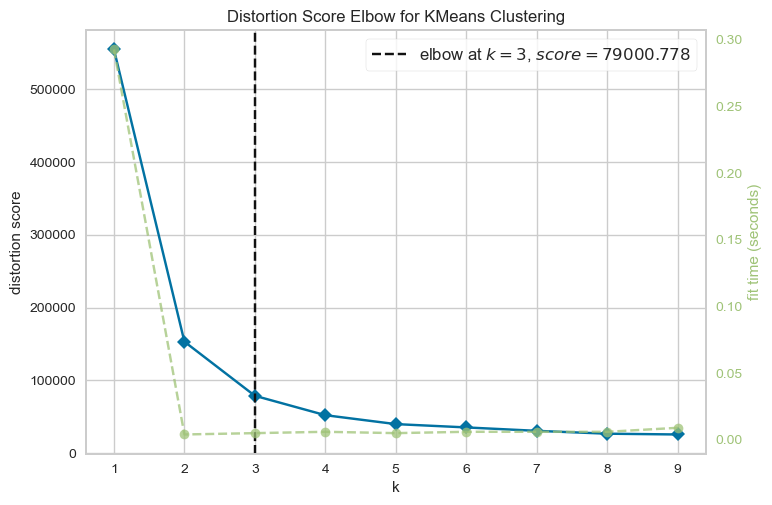

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
X =  newdf.values
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [32]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

newdf['Cluster'] = labels
newdf['Cluster'].value_counts()

Cluster
0    1824
1    1811
2    1621
Name: count, dtype: int64

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [35]:
# Menghitung silhouette score
kmeans_silhouette = silhouette_score(X, labels)
print("Silhouette Score:", kmeans_silhouette)

Silhouette Score: 0.5098841330761151


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [38]:
# Menggunakan PCA untuk mengurangi dimensional
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca['Cluster'] = labels
X_pca.head()

,PC1,PC2,Cluster
0,-17.119011,-1.043028,2
1,-17.119170,-0.991224,2
2,-17.119249,-0.735241,2
3,-17.119498,-0.659099,2
4,-17.116753,-1.161063,2


In [39]:
kmeans = KMeans(n_clusters=3)
k_labels = kmeans.fit_predict(X_pca)

X_pca['Cluster'] = labels
X_pca['Cluster'].value_counts()

Cluster
0    1824
1    1811
2    1621
Name: count, dtype: int64

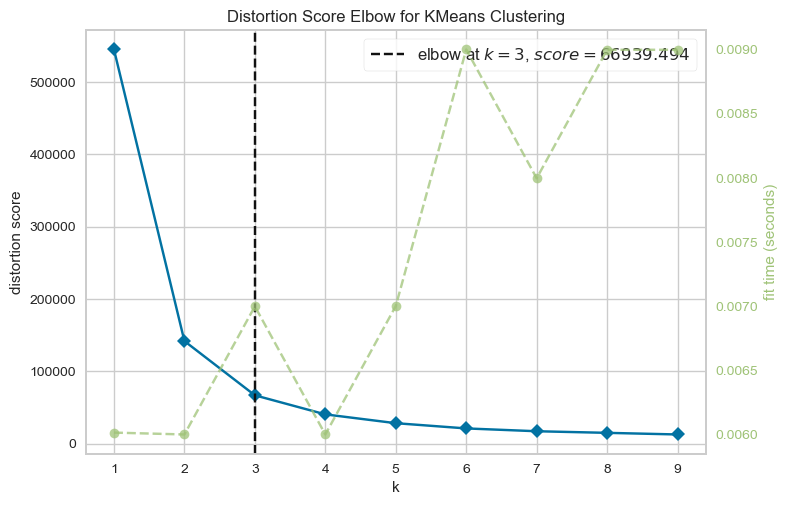

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_pca)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [41]:
# Menghitung silhouette score
kmeans_silhouette = silhouette_score(X_pca, labels)
print("Silhouette Score:", kmeans_silhouette)

Silhouette Score: 0.5602867877184982


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

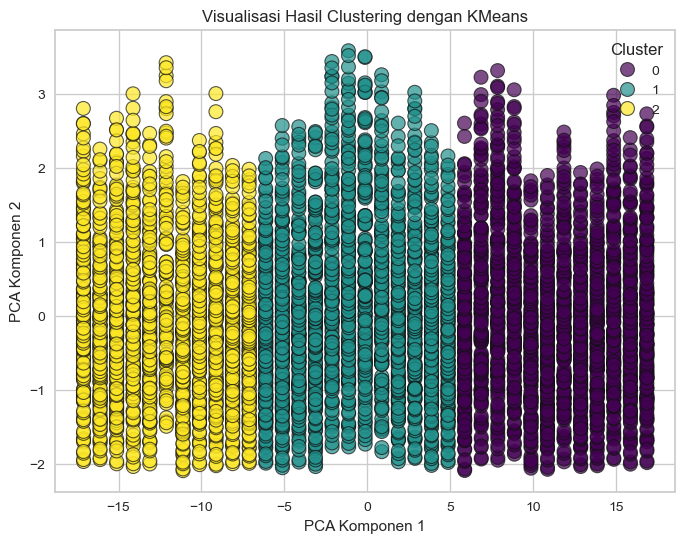

In [44]:
# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca.iloc[:, 0], y=X_pca.iloc[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('Visualisasi Hasil Clustering dengan KMeans')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [48]:
newdf['Cluster'] = labels
newdf.head()

,provinsi,jenis,daerah,tahun,periode,gk,Cluster
0,0,0,2,-1.302065,0,-0.064537,2
1,0,0,2,-1.302065,1,-0.011230,2
2,0,0,2,-0.900720,0,0.014788,2
3,0,0,2,-0.900720,1,0.100302,2
4,0,0,0,-1.302065,0,-0.040624,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [51]:
newdf[numeric_columns] = scaler.inverse_transform(newdf[numeric_columns])
newdf.head()

,provinsi,jenis,daerah,tahun,periode,gk,Cluster
0,0,0,2,2015.0,0,293697.0,2
1,0,0,2,2015.0,1,302128.0,2
2,0,0,2,2016.0,0,306243.0,2
3,0,0,2,2016.0,1,319768.0,2
4,0,0,0,2015.0,0,297479.0,2


In [52]:
df[numeric_columns] = newdf[numeric_columns]
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,gk_bin
0,ACEH,MAKANAN,PERKOTAAN,2015.0,MARET,293697.0,sedang
1,ACEH,MAKANAN,PERKOTAAN,2015.0,SEPTEMBER,302128.0,sedang
2,ACEH,MAKANAN,PERKOTAAN,2016.0,MARET,306243.0,sedang
3,ACEH,MAKANAN,PERKOTAAN,2016.0,SEPTEMBER,319768.0,sedang
4,ACEH,MAKANAN,PERDESAAN,2015.0,MARET,297479.0,sedang


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [54]:
# Menyusun statistik deskriptif berdasarkan cluster
subset_df = newdf[['tahun','gk', 'Cluster']]

# Mengelompokkan berdasarkan 'Cluster' dan mendapatkan statistik deskriptif
cluster_stats = subset_df.groupby('Cluster').describe()

# Menampilkan statistik deskriptif secara lengkap
print(cluster_stats)

          tahun                                                         \
          count         mean       std     min     25%     50%     75%   
Cluster                                                                  
0        1824.0  2018.236842  2.497358  2013.0  2016.0  2018.0  2020.0   
1        1811.0  2018.247377  2.478323  2013.0  2016.0  2018.0  2020.0   
2        1621.0  2018.237508  2.497352  2013.0  2016.0  2018.0  2020.0   

                     gk                                                    \
            max   count           mean            std      min        25%   
Cluster                                                                     
0        2022.0  1824.0  288622.154605  151798.694926  48561.0  132492.25   
1        2022.0  1811.0  329320.198785  169277.736690  61456.0  166446.50   
2        2022.0  1621.0  291040.357187  145739.870722  55866.0  137476.00   

                                       
              50%       75%       max  
Cluster     

# Cluster 0: Kondisi Ekonomi Stabil dengan Pendapatan Moderat
Karakteristik Utama:

Pendapatan Moderat: Individu dalam cluster ini memiliki rata-rata pendapatan sekitar 290,828. Meskipun tidak setinggi cluster lainnya, pendapatan di cluster ini masih menunjukkan kestabilan ekonomi.
Tahun yang Konsisten: Data lebih terfokus pada tahun 2018, yang menunjukkan stabilitas waktu dan kondisi ekonomi pada periode tersebut.
Variasi Pendapatan yang Signifikan: Meskipun rata-rata pendapatan menunjukkan angka yang moderat, terdapat variasi yang cukup besar (standar deviasi 153,132.33), yang mengindikasikan ketidakmerataan pendapatan di dalam cluster ini.
Implikasi:

Penguatan Kesejahteraan Ekonomi: Cluster 0 membutuhkan perhatian pada distribusi pendapatan yang lebih merata, meskipun kondisi ekonomi secara keseluruhan relatif stabil.
Rekomendasi Intervensi:
Fokus pada program pemberdayaan ekonomi untuk meningkatkan peluang bagi individu dengan pendapatan lebih rendah.
Peningkatan akses ke pendidikan dan keterampilan untuk meningkatkan daya saing individu dengan pendapatan lebih rendah.
Program pengentasan kemiskinan yang lebih terfokus pada mengurangi ketimpangan ekonomi dalam cluster ini.

## Cluster 1: Kondisi Ekonomi Relatif Stabil dengan Pendapatan Tinggi
Karakteristik Utama:

Pendapatan Lebih Tinggi: Rata-rata pendapatan untuk cluster ini adalah sekitar 288,271, sedikit lebih rendah dibandingkan dengan cluster 0, tetapi tetap menunjukkan tingkat pendapatan yang cukup tinggi.
Tahun yang Konsisten: Seperti Cluster 0, data dalam cluster ini juga berfokus pada tahun 2018, yang menunjukkan konsistensi dalam kondisi ekonomi selama periode tersebut.
Pendapatan dengan Variasi: Meskipun rata-rata pendapatan cukup tinggi, variabilitas pendapatan juga cukup signifikan dengan standar deviasi 144,218.70.
Implikasi:

Pertumbuhan Ekonomi yang Lebih Merata: Cluster 1 menunjukkan potensi untuk memperbaiki kesejahteraan ekonomi lebih lanjut dengan mendukung individu yang memiliki pendapatan lebih rendah.
Rekomendasi Intervensi:
Mendorong investasi dalam sektor pendidikan dan pelatihan untuk meningkatkan keterampilan tenaga kerja dan menurunkan ketimpangan.
Program untuk mengoptimalkan pemanfaatan sumber daya lokal dan meningkatkan kapasitas produksi ekonomi di daerah ini.
Memperkuat infrastruktur untuk mendukung pertumbuhan ekonomi yang lebih berkelanjutan.

## Cluster 2: Kondisi Ekonomi Lebih Stabil dengan Pendapatan Tinggi
Karakteristik Utama:

Pendapatan Tinggi: Individu dalam cluster ini memiliki rata-rata pendapatan tertinggi di antara semua cluster, dengan angka 329,793. Hal ini menunjukkan bahwa cluster ini mencakup individu dengan daya beli yang sangat baik.
Tahun yang Konsisten: Data pada cluster ini juga berfokus pada tahun 2018, menunjukkan bahwa kondisi ekonomi cluster ini mengikuti tren waktu yang serupa dengan cluster lainnya.
Pendapatan yang Sangat Variatif: Meskipun rata-rata pendapatan tinggi, terdapat variasi yang lebih besar dalam pendapatan di cluster ini (standar deviasi 169,778.24).
Implikasi:

Peningkatan Kualitas Hidup dan Kesejahteraan: Cluster 2 menunjukkan bahwa kelompok ini memiliki potensi ekonomi yang lebih besar, sehingga pengembangan program untuk mempertahankan dan meningkatkan kualitas hidup dapat lebih difokuskan pada cluster ini.
Rekomendasi Intervensi:
Mengoptimalkan peluang untuk meningkatkan kualitas hidup dengan memperkuat akses ke layanan kesehatan, pendidikan, dan infrastruktur untuk mempertahankan kesejahteraan ekonomi.
Menyediakan peluang investasi lebih lanjut yang mendukung pertumbuhan ekonomi berkelanjutan.
Fokus pada pemerataan sumber daya untuk memastikan bahwa manfaat ekonomi dapat dirasakan oleh semua individu dalam cluster ini.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Tahun Garis Kemiskinan:** 2018  
- **Rata-rata Garis Kemiskinan:** 290,827.65
- **Analisis:** Cluster ini berisi individu dengan pendapatan rata-rata sekitar 290,828, dan data ini mayoritas berada di sekitar tahun 2018 hingga 2020. Ini menunjukkan adanya kelompok dengan pendapatan yang relatif tinggi, meskipun masih ada variasi besar dalam nilai pendapatannya.

## Cluster 2:
- **Rata-rata Tahun Garis Kemiskinan:** 2018  
- **Rata-rata Garis Kemiskinan:** 288,270.72
- **Analisis:** Cluster ini memiliki individu dengan rata-rata pendapatan sekitar 288,271, sedikit lebih rendah daripada Cluster 0. Seperti cluster lainnya, data ini berfokus pada tahun 2018, dengan konsistensi dalam pola waktu yang digunakan.

## Cluster 3:
- **Rata-rata Tahun Garis Kemiskinan:** 2018  
- **Rata-rata Garis Kemiskinan:** 329,792.54
- **Analisis:** Cluster ini menunjukkan pendapatan rata-rata sekitar 329,793, yang lebih tinggi dibandingkan dua cluster lainnya. Data juga berfokus pada tahun 2018, mencerminkan tren waktu yang sama dengan cluster lainnya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [58]:
df.to_csv('garisKemiskinan_clustering.csv', index=False)